**Gabriel Ferreira da Costa - 19.1.4047**

# Importar bibliotecas necessárias para executar o código


In [ ]:
from random import *
import matplotlib.pyplot as plt
import numpy as np

# Definição do ambiente

Vamos armazenar no ambiente as seguintes informações: 
*   Informação do dia
*   Preço dos combustíveis em cada um dos dias do mês
*   Histórico de preços
*   Histórico do volume no tanque
*   Histórico com o volume de combustíveis comprados

In [ ]:
# Definicao da classe ambiente
# Tomando um volume máximo de 40 litros

class Ambiente():

  def __init__(self):
    # Ambiente explorado pelo agente
    self.num_dias = 0
    self.volume_atual = 25 # Volume inicial no tanque
    self.historico_preco_alcool = [5.706] # Preço atual do álcool
    self.historico_preco_gasolina = [7.499] # Preço atual da gasolina
    self.historico_volume_atual = [self.volume_atual]
    self.historico_volumes_comprados = [0]
  
  def percebe_preco_atual_alcool(self):
    return self.historico_preco_alcool[len(self.historico_preco_alcool) - 1] 

  def percebe_preco_atual_gasolina(self):
    return self.historico_preco_gasolina[len(self.historico_preco_gasolina) - 1] 
    
  def percebe_qtde_combustivel(self):
    return self.historico_volume_atual[len(self.historico_volume_atual) - 1] 

  def run(self, dic_acoes):
    '''Realizar alteracoes no ambiente: 
      Definir, aleatoriamente, uma quantidade de volume consumido
      Atualizar o histórico do preco atual do álcool e da gasolina 
      Essas informações serão utilizadas pelo agente para decidir a compra ou não de combustíveis
    '''
    # Consumo realizado (valores gerados aleatoriamente)
    qtde_consumidos = randint(0,40) # recebe aleatoriamente valores entre 0 e 40 litros [start, end] - Intervalo fechado
    while(self.volume_atual + qtde_consumidos > 40): # Não queremos que o volume comprado seja maior que o atual 
      qtde_consumidos = randint(0,40)
    volume = self.historico_volume_atual[len(self.historico_volume_atual) - 1] - qtde_consumidos + dic_acoes["comprar"]
    self.historico_volume_atual.append(volume)
    self.historico_volumes_comprados.append(dic_acoes["comprar"])

    # Informando valor do produto no periodo (Atualizacao para o proximo dia)
    valor_alcool = 2 + 3 * random() # Novo valor do álcool, levando em conta a alta de 3,60% no combustível - random() gera valores entre [4,6] 
    valor_gasolina = 4 + 5 * random() # Novo valor do gasolina, levando em conta a alta de 8,1% no combustível - random() gera valores entre [6,7] 
    self.historico_preco_alcool.append(valor_alcool)
    self.historico_preco_gasolina.append(valor_gasolina)



# Definição do agente

O agente vai armazenar informações sobre:
*   Ambiente (Composição de classes)
*   Valor médio dos volumes comprados
*   Informação do último valor dos combustíveis
*   Informação sobre o volume atual no tanque

In [ ]:
# Definição da classe agente

class Agente():
  
  def __init__(self, ambiente):
    self.num_dias = 1
    self.ambiente= ambiente
    self.volume_tanque = ambiente.percebe_qtde_combustivel()
    self.total_gasto = 0
    self.preco_atual_alcool = self.media_alcool = ambiente.percebe_preco_atual_alcool()
    self.preco_atual_gasolina = self.media_gasolina = ambiente.percebe_preco_atual_gasolina()

  def executa_agente(self, qtd_dias = 20):
    combustivel = ''
    for i in range(qtd_dias): 
      # O agente percebe o estado do ambiente
      self.volume_tanque = self.ambiente.percebe_qtde_combustivel()
      self.preco_atual_alcool = self.ambiente.percebe_preco_atual_alcool()
      self.preco_atual_gasolina = self.ambiente.percebe_preco_atual_gasolina()
      
      '''
        Controlador do agente:
        - Define a regra para compra de produtos
      '''
      if ((self.preco_atual_gasolina * 0.7) > self.preco_atual_alcool and (self.preco_atual_alcool / self.preco_atual_gasolina) < 0.7):
        disponivel = abs(self.volume_tanque - 40)
        compra = disponivel
        combustivel = 'alcool'
      else:
        disponivel = abs(self.volume_tanque - 40)
        compra = disponivel
        combustivel = 'gasolina'
      
      # Fim do controlador
      if(combustivel == 'alcool'):
        self.total_gasto += self.preco_atual_alcool * compra
        # O agente aplica modificacoes ao ambiente
        self.ambiente.run({"comprar": compra})
        self.num_dias += 1
        self.media_alcool = (self.media_alcool * (self.num_dias-1) + self.preco_atual_alcool) / self.num_dias
      else:
        self.total_gasto += self.preco_atual_gasolina * compra
        # O agente aplica modificacoes ao ambiente
        self.ambiente.run({"comprar": compra})
        self.num_dias += 1
        self.media_gasolina = (self.media_gasolina * (self.num_dias - 1) + self.preco_atual_gasolina) / self.num_dias


# Definir classe para impressão dos resultados



In [ ]:
class Imprime():
  def imprime_resultado(agente):
    historico_dias = np.linspace(0, agente.num_dias, agente.num_dias)

    # Primeira impressão: historico do preço do álcool
    plt.plot(historico_dias, agente.ambiente.historico_preco_alcool, 'bo--', label = 'Histórico do preço do álcool - R$')
    plt.legend()
    plt.show()

    # Segunda impressão: historico do preço da gasolina
    plt.plot(historico_dias, agente.ambiente.historico_preco_gasolina, 'k', label = 'Histórico do preço da gasolina - R$')
    plt.legend()
    plt.show()

    # Terceira impressão: histórico dos volumes de combustíveis comprados
    fig, ax = plt.subplots()    
    ax.vlines(historico_dias, ymin=0, ymax = agente.ambiente.historico_volumes_comprados)
    ax.plot(historico_dias, agente.ambiente.historico_volumes_comprados, "o", color = 'green')
    ax.set_ylim(0, 100)
    plt.show()

    # Quarta impressão: histórico
    plt.plot(historico_dias, agente.ambiente.historico_volume_atual, 'rD--', label='Historico do volume no tanque')
    plt.legend()
    plt.show()

# Execução do programa

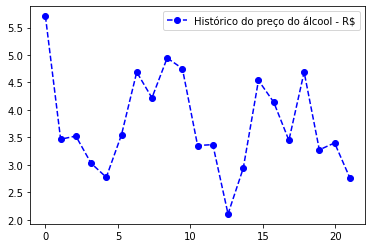

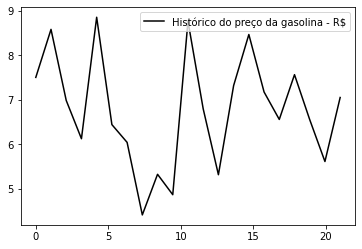

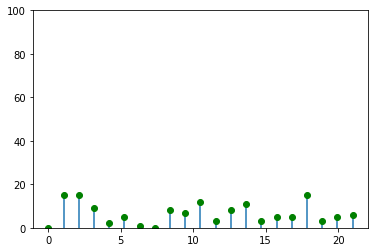

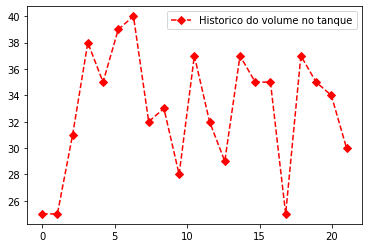

In [ ]:
ambiente_atuacao = Ambiente()
TanqueInteligente = Agente(ambiente_atuacao)
TanqueInteligente.executa_agente(20)


Imprime.imprime_resultado(TanqueInteligente)